# Analysis of Cars


### Content
+ Introduction
+ Research questions
+ Web scraping
+ Data preparation
+ EDA
+ Encoding and Preparing categorical variables
+ Model Building & Prediction accuracy 
+ Conclusion

### Columns:
   + brand - trade mark of cars
   + model - different patterns of car brand
   + year - the time when car produced
   + price - cost of the car
   + color - shade of the car
   + condition - gives information was the car used or new
   + transmission - gives information is the cars transmission auto or manual
   + fuel_type - gives information about what type of fuel car uses
   + mileage - gives information how many kilometers a car has run

## 1. Introduction: Cars Price Prediction Analysis



+ The purpose of our Cars Price Prediction Analysis was to demonstrate and predict prices of cars in Hamilton city. According to this analysis, people can easily find the favorite and suitable car for future driving in the city. 
+ Firstly, we have scraped the data more than 1300 rows from the website kijiji.com, which are grouped by model, brand, price, color, condition, transmission, fuel type and mileage.
+ After that we have done an exploratory data analysis by making graphs in order to understand and find out more clearly the dataset. Furthermore, we have made a data preparation by dropping missing values, and preprocessing by using Standard scaler library. Finally, created the suitable models by using Linear Regression and KNN classifier.

## 2. Research questions
+ Analyze the which colored cars people are prefer to drive
+ Analyze the ratio of car transmissions
+ Analyze the time period when cars had high selling (sale)
+ Analyze the correlation between fuel type and car transmission
+ Analyze the connection between the price and mileage category of each car transmission type

## 3. Web scraping



In [ ]:
#imported needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup 

import datetime
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#Our main url which we parsed data from 
init_url = 'https://www.kijiji.ca/b-cars-trucks/hamilton/c174l80014'

In [ ]:
#Function to get number of pages to run 
# in that pages and get information from them
def get_page_num(url):
    
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser')
    try:
        page_info = bs.find('div',class_='showing').text
        page_num = page_info.split()[-2].replace(',','')
        page_num = int(int(page_num)/20)
    except:
        page_num = 1
        pass
    
    return page_num


In [ ]:
#returns the page num which was taken from fucntion get_page_num
page_num = get_page_num(init_url)

page_num

201

In [ ]:
#Function to parse the items information from each link and appends it to list 
def get_item_info(url):
    item_info_list = []
   
        
    html = urlopen(url) # given link
    bs_item = BeautifulSoup(html, 'html.parser')
    
    try: 
        brand = bs_item.find(itemprop='brand').text
    except:
        brand ='NaN'
    
    
    try:
        model = bs_item.find(itemprop='model').text
    except:
        model ='NaN'
    
    try:
        date = bs_item.find(itemprop='vehicleModelDate').text
    except:
        date ='NaN'
    
    try:
        price = bs_item.find('span',itemprop='price').text
    except:
        price = 'NaN'
    
    try:
        color = bs_item.find(itemprop='color').text
    except:
        color = 'NaN'
        
    try:
        condition = bs_item.find(itemprop='itemCondition').text
    except:
        condition = 'NaN'
        
    try:
        transmission = bs_item.find(itemprop='vehicleTransmission').text
    except:
        transmission = 'NaN'
        
    try:
        fueltype = bs_item.find(itemprop='fuelType').text
    except:
        fueltype = 'NaN'
        
    try:
        mileage = bs_item.find(itemprop='mileageFromOdometer').text
    except:
        mileage = 'NaN'
    
#Appending each information to item_info_list list
    item_info_list.append(brand)
    item_info_list.append(model)
    item_info_list.append(date)
    item_info_list.append(price)
    item_info_list.append(color)
    item_info_list.append(condition)
    item_info_list.append(transmission)
    item_info_list.append(fueltype)
    item_info_list.append(mileage)
    
    return item_info_list
    

In [ ]:
#Parsing information and appending to the list 
all_info_list = []
itemlist = []

base_url = 'https://www.kijiji.ca'

for page in range(1,page_num): #Runs in each page
    page_url = 'https://www.kijiji.ca/b-cars-trucks/hamilton/'+'page+'+ str(page)+'/c174l80014'
    html = urlopen(page_url)
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/v-cars-trucks/)((?!:).)*$')):
        if 'href' in link.attrs:
            item_url = base_url + link.attrs['href']
            if '?' not in item_url:
                print(item_url)
                itemlist = get_item_info(item_url)
                print(itemlist)
                all_info_list.append(itemlist)
                itemlist = []

https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le/m918263
['Toyota', 'RAV4', '2017', '$18,998.00', 'Black', 'Used', 'Automatic', 'Other', '76,091']
https://www.kijiji.ca/v-cars-trucks/peterborough/2018-mitsubishi-rvr-se/m174102
['Mitsubishi', 'RVR', '2018', '$18,998.00', 'Silver', 'Used', 'Automatic', 'Other', '25,525']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-buick-encore-sport-touring/m796291
['Buick', 'Encore', '2019', '$23,998.00', 'Other', 'Used', 'Automatic', 'Other', '38,250']
https://www.kijiji.ca/v-cars-trucks/hamilton/kia-forte5-hatchback/1559121905
['Kia', 'Forte5', '2012', '$4,000.00', 'Black', 'Used', 'Other', 'Gasoline', '202,500']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda', 'CR-V', '2016', '$18,998.00', 'Other', 'Used', 'Automatic', 'Other', '72,897']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-off-lease-only-33745-kms-bu-camera/m1070737
['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Us

['Ford', 'Transit', '2017', '$35,499.00', 'Black', 'Used', 'Automatic', 'Gasoline', '112,571']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-ford-escape-se-1-owner-low-kms/m989475
['Ford', 'Escape', '2017', '$17,888.00', 'Gold', 'Used', 'Automatic', 'Gasoline', '23,329']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-dodge-caravan-stow-n-go-low-km/1560059524
['Dodge', 'Caravan', '2012', '$7,000.00', 'Grey', 'Used', 'Automatic', 'NaN', '137,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-honda-odyssey-ex-l/m357279
['Honda', 'Odyssey', '2017', '$25,595.00', 'Other', 'Used', 'Automatic', 'Other', '107,049']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-off-lease-only-33745-kms-bu-camera/m1070737
['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-trucks/hamilton/2006-mazda-mazda5-se/m817916
['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.

['Jeep', 'Patriot', '2013', '$5,495.00', 'Silver', 'Used', 'Automatic', 'Gasoline', '194,720']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-honda-odyssey-ex-l/m357279
['Honda', 'Odyssey', '2017', '$25,595.00', 'Other', 'Used', 'Automatic', 'Other', '107,049']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-off-lease-only-33745-kms-bu-camera/m1070737
['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-trucks/hamilton/2006-mazda-mazda5-se/m817916
['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se-se-upgrade-sunroof-alloy-off-lease/m1070703
['Toyota', 'Corolla', '2017', '$16,900.00', 'White', 'Used', 'NaN', 'Gasoline', '95,547']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-volkswagen-jetta-sedan-comfort/m817912
['Volkswagen', 'Jetta', '2010', '$3,495.00', 'Black', 'Used', 'Manual', 'Gasoline',

['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-trucks/hamilton/2006-mazda-mazda5-se/m817916
['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se-se-upgrade-sunroof-alloy-off-lease/m1070703
['Toyota', 'Corolla', '2017', '$16,900.00', 'White', 'Used', 'NaN', 'Gasoline', '95,547']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-volkswagen-jetta-sedan-comfort/m817912
['Volkswagen', 'Jetta', '2010', '$3,495.00', 'Black', 'Used', 'Manual', 'Gasoline', '185,450']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-audi-a8-3-0t-accident-free-low-kms-diamond-stitched-seats/m372671
['Audi', 'A8', '2014', '$25,999.00', 'Black', 'Used', 'NaN', 'Gasoline', '122,408']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['Jeep', 'Wrangler', '2016', '$29,999.00', '

['Volkswagen', 'Jetta', '2010', '$3,495.00', 'Black', 'Used', 'Manual', 'Gasoline', '185,450']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-audi-a8-3-0t-accident-free-low-kms-diamond-stitched-seats/m372671
['Audi', 'A8', '2014', '$25,999.00', 'Black', 'Used', 'NaN', 'Gasoline', '122,408']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['Jeep', 'Wrangler', '2016', '$29,999.00', 'Blue', 'Used', 'NaN', 'Gasoline', '130,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-nissan-versa-note-sv/m357239
['Nissan', 'Versa', '2014', '$8,595.00', 'Other', 'Used', 'Automatic', 'Other', '122,179']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-chevy-2500-hd-high-country-duramax-oil-sprayed-every-year/1560712342
['Chevrolet', 'Silverado 2500', '2019', '$80,000.00', 'White', 'Used', 'Automatic', 'NaN', '85,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-toyota-rav4-xle-off-lease-only-50137-km-proxy-entry-p/m107

['Audi', 'A8', '2014', '$25,999.00', 'Black', 'Used', 'NaN', 'Gasoline', '122,408']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['Jeep', 'Wrangler', '2016', '$29,999.00', 'Blue', 'Used', 'NaN', 'Gasoline', '130,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-nissan-versa-note-sv/m357239
['Nissan', 'Versa', '2014', '$8,595.00', 'Other', 'Used', 'Automatic', 'Other', '122,179']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-chevy-2500-hd-high-country-duramax-oil-sprayed-every-year/1560712342
['Chevrolet', 'Silverado 2500', '2019', '$80,000.00', 'White', 'Used', 'Automatic', 'NaN', '85,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-toyota-rav4-xle-off-lease-only-50137-km-proxy-entry-p/m1070696
['Toyota', 'RAV4', '2018', '$25,400.00', 'Black', 'Used', 'NaN', 'Gasoline', '50,137']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-chevrolet-impala-police-impala-police/m817905
['Other', 'Other', '201

['Jeep', 'Wrangler', '2016', '$29,999.00', 'Blue', 'Used', 'NaN', 'Gasoline', '130,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-nissan-versa-note-sv/m357239
['Nissan', 'Versa', '2014', '$8,595.00', 'Other', 'Used', 'Automatic', 'Other', '122,179']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-chevy-2500-hd-high-country-duramax-oil-sprayed-every-year/1560712342
['Chevrolet', 'Silverado 2500', '2019', '$80,000.00', 'White', 'Used', 'Automatic', 'NaN', '85,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-toyota-rav4-xle-off-lease-only-50137-km-proxy-entry-p/m1070696
['Toyota', 'RAV4', '2018', '$25,400.00', 'Black', 'Used', 'NaN', 'Gasoline', '50,137']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-chevrolet-impala-police-impala-police/m817905
['Other', 'Other', '2012', '$4,995.00', 'Gold', 'Used', 'Automatic', 'Other', '210,500']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-mazda/1560711199
['Mazda', '3', '2012', '$2,500.00', 'White', 'Used', 'NaN', 'NaN', '2

['Toyota', 'RAV4', '2018', '$25,400.00', 'Black', 'Used', 'NaN', 'Gasoline', '50,137']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-chevrolet-impala-police-impala-police/m817905
['Other', 'Other', '2012', '$4,995.00', 'Gold', 'Used', 'Automatic', 'Other', '210,500']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-mazda/1560711199
['Mazda', '3', '2012', '$2,500.00', 'White', 'Used', 'NaN', 'NaN', '220,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-ford-edge-titanium/m796295
['Ford', 'Edge', '2017', '$22,498.00', 'Other', 'Used', 'Automatic', 'Other', '81,718']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-hyundai-santa-fe-sport/m796340
['Hyundai', 'Santa Fe', '2017', '$22,998.00', 'Other', 'Used', 'Automatic', 'Other', '74,486']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-venza/m796287
['Toyota', 'Venza', '2016', '$20,998.00', 'Other', 'Used', 'Automatic', 'Other', '69,224']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda'

['Ford', 'Edge', '2017', '$22,498.00', 'Other', 'Used', 'Automatic', 'Other', '81,718']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-hyundai-santa-fe-sport/m796340
['Hyundai', 'Santa Fe', '2017', '$22,998.00', 'Other', 'Used', 'Automatic', 'Other', '74,486']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-venza/m796287
['Toyota', 'Venza', '2016', '$20,998.00', 'Other', 'Used', 'Automatic', 'Other', '69,224']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda', 'CR-V', '2016', '$18,998.00', 'Other', 'Used', 'Automatic', 'Other', '72,897']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le/m796282
['Toyota', 'RAV4', '2017', '$19,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,245']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-camry-xse/m887905
['Toyota', 'Camry', '2016', '$16,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,966']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-mazda-cx-3-gs/m796334
['Mazda', 'C

['Toyota', 'Venza', '2016', '$20,998.00', 'Other', 'Used', 'Automatic', 'Other', '69,224']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda', 'CR-V', '2016', '$18,998.00', 'Other', 'Used', 'Automatic', 'Other', '72,897']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le/m796282
['Toyota', 'RAV4', '2017', '$19,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,245']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-camry-xse/m887905
['Toyota', 'Camry', '2016', '$16,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,966']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-mazda-cx-3-gs/m796334
['Mazda', 'CX-3', '2018', '$17,498.00', 'Other', 'Used', 'Automatic', 'Other', '63,156']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-nissan-rogue/m796324
['Nissan', 'Rogue', '2017', '$16,498.00', 'Other', 'Used', 'Automatic', 'Other', '72,081']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-hyundai-sonata/m796419
['Hyundai', 'Sonata', '

['Toyota', 'RAV4', '2017', '$19,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,245']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-camry-xse/m887905
['Toyota', 'Camry', '2016', '$16,998.00', 'Black', 'Used', 'Automatic', 'Other', '93,966']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-mazda-cx-3-gs/m796334
['Mazda', 'CX-3', '2018', '$17,498.00', 'Other', 'Used', 'Automatic', 'Other', '63,156']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-nissan-rogue/m796324
['Nissan', 'Rogue', '2017', '$16,498.00', 'Other', 'Used', 'Automatic', 'Other', '72,081']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-hyundai-sonata/m796419
['Hyundai', 'Sonata', '2018', '$16,399.00', 'Other', 'Used', 'Automatic', 'Other', '67,231']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-infiniti-qx70-sport-52k-km-fully-loaded/1560710851
['Infiniti', 'QX70', '2017', '$39,900.00', 'Black', 'Used', 'Automatic', 'Gasoline', '52,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-co

['Nissan', 'Rogue', '2017', '$16,498.00', 'Other', 'Used', 'Automatic', 'Other', '72,081']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-hyundai-sonata/m796419
['Hyundai', 'Sonata', '2018', '$16,399.00', 'Other', 'Used', 'Automatic', 'Other', '67,231']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-infiniti-qx70-sport-52k-km-fully-loaded/1560710851
['Infiniti', 'QX70', '2017', '$39,900.00', 'Black', 'Used', 'Automatic', 'Gasoline', '52,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-im-off-lease-only-45079-kms-bu-camera/m1070694
['Toyota', 'Corolla', '2017', '$16,400.00', 'Blue', 'Used', 'NaN', 'Gasoline', '45,079']
https://www.kijiji.ca/v-cars-trucks/hamilton/2013-kia-forte-se/m817904
['Kia', 'Forte', '2013', '$3,995.00', 'Silver', 'Used', 'Automatic', 'Gasoline', '221,150']
https://www.kijiji.ca/v-cars-trucks/hamilton/2015-toyota-highlander-xle-xle-only-93005-kms-leather-sun/m695112
['Toyota', 'Highlander', '2015', '$27,400.00', 'Gold', 'Used', 'NaN', 'G

['Hyundai', 'Sonata', '2018', '$16,399.00', 'Other', 'Used', 'Automatic', 'Other', '67,231']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-infiniti-qx70-sport-52k-km-fully-loaded/1560710851
['Infiniti', 'QX70', '2017', '$39,900.00', 'Black', 'Used', 'Automatic', 'Gasoline', '52,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-im-off-lease-only-45079-kms-bu-camera/m1070694
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2013-kia-forte-se/m817904
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2015-toyota-highlander-xle-xle-only-93005-kms-leather-sun/m695112
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-sold-pending-delivery/m1070658
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2020-mazda3-sport-gt

['Toyota', 'Highlander', '2015', '$27,400.00', 'Gold', 'Used', 'NaN', 'Gasoline', '93,005']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-sold-pending-delivery/m1070658
['Toyota', 'RAV4', '2017', '$19,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '66,128']
https://www.kijiji.ca/v-cars-trucks/hamilton/2020-mazda3-sport-gt-awd-lease-takeover/1560707672
['Mazda', 'Mazda3 Sport', '2020', '$230.00', 'NaN', 'Lease Takeover', 'Automatic', 'Gasoline', '10,600']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-hyundai-genesis-coupe-premium/m1011237
['Hyundai', 'Genesis Coupe', '2010', '$5,995.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '245,800']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-hyundai-santa-fe-sport-2wd/m357230
['Hyundai', 'Santa Fe', '2014', '$11,595.00', 'Silver', 'Used', 'Automatic', 'Other', '111,135']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-le-off-lease-only-61691-kms-new-front-b/m1070655
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'N

['Toyota', 'RAV4', '2017', '$19,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '66,128']
https://www.kijiji.ca/v-cars-trucks/hamilton/2020-mazda3-sport-gt-awd-lease-takeover/1560707672
['Mazda', 'Mazda3 Sport', '2020', '$230.00', 'NaN', 'Lease Takeover', 'Automatic', 'Gasoline', '10,600']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-hyundai-genesis-coupe-premium/m1011237
['Hyundai', 'Genesis Coupe', '2010', '$5,995.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '245,800']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-hyundai-santa-fe-sport-2wd/m357230
['Hyundai', 'Santa Fe', '2014', '$11,595.00', 'Silver', 'Used', 'Automatic', 'Other', '111,135']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-le-off-lease-only-61691-kms-new-front-b/m1070655
['Toyota', 'Corolla', '2017', '$14,800.00', 'Silver', 'Used', 'NaN', 'Gasoline', '61,691']
https://www.kijiji.ca/v-cars-trucks/hamilton/2013-ram-1500-slt/m1011230
['Ram', '1500', '2013', '$14,995.00', 'Red', 'Used', 'Automatic

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-hyundai-genesis-coupe-premium/m1011237
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-hyundai-santa-fe-sport-2wd/m357230
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-le-off-lease-only-61691-kms-new-front-b/m1070655
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2013-ram-1500-slt/m1011230
['Ram', '1500', '2013', '$14,995.00', 'Red', 'Used', 'Automatic', 'Gasoline', '250,900']
https://www.kijiji.ca/v-cars-trucks/hamilton/1988-f250-xlt-lariat-unbelievable/1560705046
['Ford', 'F-250', '1988', 'NaN', 'Red', 'Used', 'Manual', 'Gasoline', '109,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-ford-escape-se/m937619
['Ford', 'Escape', '2014', '$9,995.00', 'White', 'U

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-hyundai-santa-fe-sport-2wd/m357230
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-le-off-lease-only-61691-kms-new-front-b/m1070655
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2013-ram-1500-slt/m1011230
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/1988-f250-xlt-lariat-unbelievable/1560705046
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-ford-escape-se/m937619
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se/m796372
['Toyota', 'Corolla', '2017', '$15,998.00', 'Other', 'Used', 'Automatic', 'Other', '92,314']
https://www.k

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/1988-f250-xlt-lariat-unbelievable/1560705046
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-gmc-sierra-1500-denali-leather-sunroof-crew-cab-clean/m372682
['GMC', 'Sierra 1500', '2018', '$38,999.00', 'White', 'Used', 'Automatic', 'Gasoline', '161,260']
https://www.kijiji.ca/v-cars-trucks/city-of-toronto/2021-ram-1500-classic-night-edition/m362443
['Ram', '1500', '2021', '$44,001.00', 'Other', 'New', 'Automatic', 'Other', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2015-bentley-continental-gt-v8s-mint/1560224251
['Bentley', 'Continental GT', '2015', '$144,000.00', 'White', 'Used', 'Automatic', 'Gasoline', '15,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-honda-cr-v-ex-1-owner-no-accidents-honda-certified/m1002414
['Honda', 'CR-V', '2018', '$25,388.00', 'Silver', 'Used', 'Automatic', 'Gasoline', '5

['Chevrolet', 'Trax', '2017', '$11,995.00', 'Blue', 'Used', 'Automatic', 'Gasoline', '171,925']
https://www.kijiji.ca/v-cars-trucks/ottawa/2020-ford-f-250/m803331
['Ford', 'F-250', '2020', '$93,777.00', 'Other', 'Used', 'NaN', 'Diesel', '31,039']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-lincoln-mkz-4d-sedan-fwd/m806523
['Lincoln', 'MKZ', '2012', '$9,492.00', 'White', 'Used', 'Automatic', 'Other', '166,446']
https://www.kijiji.ca/v-cars-trucks/hamilton/2009-toyota-matrix-xr-low-kms-safety-certified/m938692
['Toyota', 'Matrix', '2009', '$6,499.00', 'White', 'Used', 'Automatic', 'Gasoline', '161,715']
https://www.kijiji.ca/v-cars-trucks/hamilton/2020-dodge-grand-caravan-premium-plus-barely-used-very-low-mileage/m920794
['Dodge', 'Grand Caravan', '2020', '$32,000.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '4,275']
https://www.kijiji.ca/v-cars-trucks/hamilton/2007-gmc-2500hd-6litre-4x4-3900-or-trade/1560724532
['GMC', 'C/K 2500', '2007', '$3,900.00', 'NaN', 'Used', 'Automatic', 

['Pontiac', 'Vibe', '2009', '$5,999.00', 'Red', 'Used', 'Automatic', 'Gasoline', '191,101']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-prius-touring-sold-pending-delivery/m720157
['Toyota', 'Prius', '2016', '$19,400.00', 'Black', 'Used', 'NaN', 'Hybrid-Electric', '64,614']
https://www.kijiji.ca/v-cars-trucks/hamilton/2020-hyundai-elantra-preferred-ivt/m298582
['Hyundai', 'Elantra', '2020', '$17,992.00', 'Other', 'Used', 'Automatic', 'Other', '14,627']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-nissan-rogue-midnight-edition/m390217
['Nissan', 'Rogue', '2018', '$25,998.00', 'Grey', 'Used', 'Manual', 'Other', '27,313']
https://www.kijiji.ca/v-cars-trucks/hamilton/2001-chevrolet-silverado-1500-4x4-z71-5-3l-188-000km/1560725766
['Chevrolet', 'Silverado 1500', '2001', '$8,500.00', 'Green', 'Used', 'Automatic', 'Gasoline', '188,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2007-gmc-2500hd-6litre-4x4-3900-or-trade/1560724532
['GMC', 'C/K 2500', '2007', '$3,900.00', 'N

['Dodge', 'Grand Caravan', '2019', '$25,992.00', 'Grey', 'Used', 'Automatic', 'Other', '42,441']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-ford-f750-box-truck/1560159156
['Ford', 'F-750', '2016', '$68,500.00', 'Yellow', 'Used', 'Automatic', 'Diesel', '114,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2001-chevrolet-silverado-1500-4x4-z71-5-3l-188-000km/1560725766
['Chevrolet', 'Silverado 1500', '2001', '$8,500.00', 'Green', 'Used', 'Automatic', 'Gasoline', '188,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2007-gmc-2500hd-6litre-4x4-3900-or-trade/1560724532
['GMC', 'C/K 2500', '2007', '$3,900.00', 'NaN', 'Used', 'Automatic', 'NaN', '558,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2009-chevy-equinox/1560723991
['Chevrolet', 'Equinox', '2009', '$3,250.00', 'Blue', 'Used', 'Automatic', 'Gasoline', '164,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2015-hyundai-santa-fe-xl-limited/m372110
['Hyundai', 'Santa Fe', '2015', '$15,995.00', 'Black', 'Used', 'Automati

['Chevrolet', 'Silverado 1500', '2001', '$8,500.00', 'Green', 'Used', 'Automatic', 'Gasoline', '188,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2007-gmc-2500hd-6litre-4x4-3900-or-trade/1560724532
['GMC', 'C/K 2500', '2007', '$3,900.00', 'NaN', 'Used', 'Automatic', 'NaN', '558,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2009-chevy-equinox/1560723991
['Chevrolet', 'Equinox', '2009', '$3,250.00', 'Blue', 'Used', 'Automatic', 'Gasoline', '164,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2015-hyundai-santa-fe-xl-limited/m372110
['Hyundai', 'Santa Fe', '2015', '$15,995.00', 'Black', 'Used', 'Automatic', 'Gasoline', '172,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-buick-envision-premium-i-awd/m357291
['Buick', 'Envision', '2019', '$29,995.00', 'Other', 'Used', 'Automatic', 'Other', '36,192']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-jeep-compass-trailhawk-4wd/m357287
['Jeep', 'Compass', '2018', '$26,995.00', 'Other', 'Used', 'Automatic', 'Other', '45,51

['Hyundai', 'Santa Fe', '2015', '$15,995.00', 'Black', 'Used', 'Automatic', 'Gasoline', '172,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-buick-envision-premium-i-awd/m357291
['Buick', 'Envision', '2019', '$29,995.00', 'Other', 'Used', 'Automatic', 'Other', '36,192']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-jeep-compass-trailhawk-4wd/m357287
['Jeep', 'Compass', '2018', '$26,995.00', 'Other', 'Used', 'Automatic', 'Other', '45,515']
https://www.kijiji.ca/v-cars-trucks/hamilton/2011-subaru-outback/1560719270
['Subaru', 'Outback', '2011', '$3,500.00', 'Black', 'Used', 'Automatic', 'Gasoline', '300,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-gmc-terrain-denali-awd/m357282
['GMC', 'Terrain', '2019', '$33,995.00', 'White', 'Used', 'Automatic', 'Other', '38,143']
https://www.kijiji.ca/v-cars-trucks/hamilton/2008-hyundai-elantra/1560718148
['Hyundai', 'Elantra', '2008', '$3,000.00', 'Red', 'Used', 'Automatic', 'Gasoline', '190,000']
https://www.kijiji.ca/v-cars-t

['Jeep', 'Compass', '2018', '$26,995.00', 'Other', 'Used', 'Automatic', 'Other', '45,515']
https://www.kijiji.ca/v-cars-trucks/hamilton/2011-subaru-outback/1560719270
['Subaru', 'Outback', '2011', '$3,500.00', 'Black', 'Used', 'Automatic', 'Gasoline', '300,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-gmc-terrain-denali-awd/m357282
['GMC', 'Terrain', '2019', '$33,995.00', 'White', 'Used', 'Automatic', 'Other', '38,143']
https://www.kijiji.ca/v-cars-trucks/hamilton/2008-hyundai-elantra/1560718148
['Hyundai', 'Elantra', '2008', '$3,000.00', 'Red', 'Used', 'Automatic', 'Gasoline', '190,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-honda-odyssey-ex-l/m357279
['Honda', 'Odyssey', '2017', '$25,595.00', 'Other', 'Used', 'Automatic', 'Other', '107,049']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-off-lease-only-33745-kms-bu-camera/m1070737
['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-

['GMC', 'Terrain', '2019', '$33,995.00', 'White', 'Used', 'Automatic', 'Other', '38,143']
https://www.kijiji.ca/v-cars-trucks/hamilton/2008-hyundai-elantra/1560718148
['Hyundai', 'Elantra', '2008', '$3,000.00', 'Red', 'Used', 'Automatic', 'Gasoline', '190,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-honda-odyssey-ex-l/m357279
['Honda', 'Odyssey', '2017', '$25,595.00', 'Other', 'Used', 'Automatic', 'Other', '107,049']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le-off-lease-only-33745-kms-bu-camera/m1070737
['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-trucks/hamilton/2006-mazda-mazda5-se/m817916
['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se-se-upgrade-sunroof-alloy-off-lease/m1070703
['Toyota', 'Corolla', '2017', '$16,900.00', 'White', 'Used', 'NaN', 'Gasoline', '95,547']
https

['Toyota', 'RAV4', '2017', '$21,900.00', 'Grey', 'Used', 'NaN', 'Gasoline', '33,745']
https://www.kijiji.ca/v-cars-trucks/hamilton/2006-mazda-mazda5-se/m817916
['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se-se-upgrade-sunroof-alloy-off-lease/m1070703
['Toyota', 'Corolla', '2017', '$16,900.00', 'White', 'Used', 'NaN', 'Gasoline', '95,547']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-volkswagen-jetta-sedan-comfort/m817912
['Volkswagen', 'Jetta', '2010', '$3,495.00', 'Black', 'Used', 'Manual', 'Gasoline', '185,450']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-audi-a8-3-0t-accident-free-low-kms-diamond-stitched-seats/m372671
['Audi', 'A8', '2014', '$25,999.00', 'Black', 'Used', 'NaN', 'Gasoline', '122,408']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['Jeep', 'Wrangler', '2016', '$29,999.00', '

['Mazda', 'Other', '2006', '$2,495.00', 'Grey', 'Used', 'Automatic', 'Gasoline', '287,100']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-corolla-se-se-upgrade-sunroof-alloy-off-lease/m1070703
['Toyota', 'Corolla', '2017', '$16,900.00', 'White', 'Used', 'NaN', 'Gasoline', '95,547']
https://www.kijiji.ca/v-cars-trucks/hamilton/2010-volkswagen-jetta-sedan-comfort/m817912
['Volkswagen', 'Jetta', '2010', '$3,495.00', 'Black', 'Used', 'Manual', 'Gasoline', '185,450']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-audi-a8-3-0t-accident-free-low-kms-diamond-stitched-seats/m372671
['Audi', 'A8', '2014', '$25,999.00', 'Black', 'Used', 'NaN', 'Gasoline', '122,408']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['Jeep', 'Wrangler', '2016', '$29,999.00', 'Blue', 'Used', 'NaN', 'Gasoline', '130,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-nissan-versa-note-sv/m357239
['Nissan', 'Versa', '2014', '$8,595.

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-audi-a8-3-0t-accident-free-low-kms-diamond-stitched-seats/m372671
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-jeep-wrangler-unlimited-sahara-detailed-4x4-winch-certified/m372678
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2014-nissan-versa-note-sv/m357239
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2019-chevy-2500-hd-high-country-duramax-oil-sprayed-every-year/1560712342
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-toyota-rav4-xle-off-lease-only-50137-km-proxy-entry-p/m1070696
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-chevrolet-impala-poli

['Toyota', 'RAV4', '2018', '$25,400.00', 'Black', 'Used', 'NaN', 'Gasoline', '50,137']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-chevrolet-impala-police-impala-police/m817905
['Other', 'Other', '2012', '$4,995.00', 'Gold', 'Used', 'Automatic', 'Other', '210,500']
https://www.kijiji.ca/v-cars-trucks/hamilton/2012-mazda/1560711199
['Mazda', '3', '2012', '$2,500.00', 'White', 'Used', 'NaN', 'NaN', '220,000']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-ford-edge-titanium/m796295
['Ford', 'Edge', '2017', '$22,498.00', 'Other', 'Used', 'Automatic', 'Other', '81,718']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-hyundai-santa-fe-sport/m796340
['Hyundai', 'Santa Fe', '2017', '$22,998.00', 'Other', 'Used', 'Automatic', 'Other', '74,486']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-venza/m796287
['Toyota', 'Venza', '2016', '$20,998.00', 'Other', 'Used', 'Automatic', 'Other', '69,224']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda'

['Ford', 'Edge', '2017', '$22,498.00', 'Other', 'Used', 'Automatic', 'Other', '81,718']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-hyundai-santa-fe-sport/m796340
['Hyundai', 'Santa Fe', '2017', '$22,998.00', 'Other', 'Used', 'Automatic', 'Other', '74,486']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-venza/m796287
['Toyota', 'Venza', '2016', '$20,998.00', 'Other', 'Used', 'Automatic', 'Other', '69,224']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-honda-cr-v-ex/m796284
['Honda', 'CR-V', '2016', '$18,998.00', 'Other', 'Used', 'Automatic', 'Other', '72,897']
https://www.kijiji.ca/v-cars-trucks/hamilton/2017-toyota-rav4-le/m796282
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2016-toyota-camry-xse/m887905
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
https://www.kijiji.ca/v-cars-trucks/hamilton/2018-mazda-cx-3-gs/m796334
['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
h

In [ ]:
#List which parsed from the whole links and includes all information about cars
all_info_list

[['Toyota',
  'RAV4',
  '2017',
  '$18,998.00',
  'Black',
  'Used',
  'Automatic',
  'Other',
  '76,091'],
 ['Mitsubishi',
  'RVR',
  '2018',
  '$18,998.00',
  'Silver',
  'Used',
  'Automatic',
  'Other',
  '25,525'],
 ['Buick',
  'Encore',
  '2019',
  '$23,998.00',
  'Other',
  'Used',
  'Automatic',
  'Other',
  '38,250'],
 ['Kia',
  'Forte5',
  '2012',
  '$4,000.00',
  'Black',
  'Used',
  'Other',
  'Gasoline',
  '202,500'],
 ['Honda',
  'CR-V',
  '2016',
  '$18,998.00',
  'Other',
  'Used',
  'Automatic',
  'Other',
  '72,897'],
 ['Toyota',
  'RAV4',
  '2017',
  '$21,900.00',
  'Grey',
  'Used',
  'NaN',
  'Gasoline',
  '33,745'],
 ['Mazda',
  'Other',
  '2006',
  '$2,495.00',
  'Grey',
  'Used',
  'Automatic',
  'Gasoline',
  '287,100'],
 ['Toyota',
  'Corolla',
  '2017',
  '$16,900.00',
  'White',
  'Used',
  'NaN',
  'Gasoline',
  '95,547'],
 ['Volkswagen',
  'Jetta',
  '2010',
  '$3,495.00',
  'Black',
  'Used',
  'Manual',
  'Gasoline',
  '185,450'],
 ['Audi',
  'A8',
  '20

In [ ]:
#Converting list to DataFrame
df = pd.DataFrame(all_info_list)

In [ ]:
#Retrieve the DataFrame
df

,0,1,2,3,4,5,6,7,8
0,Toyota,RAV4,2017,"$18,998.00",Black,Used,Automatic,Other,"76,091"
1,Mitsubishi,RVR,2018,"$18,998.00",Silver,Used,Automatic,Other,"25,525"
2,Buick,Encore,2019,"$23,998.00",Other,Used,Automatic,Other,"38,250"
3,Kia,Forte5,2012,"$4,000.00",Black,Used,Other,Gasoline,"202,500"
4,Honda,CR-V,2016,"$18,998.00",Other,Used,Automatic,Other,"72,897"
...,...,...,...,...,...,...,...,...,...
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Column names to change the column names in DataFrame
columns_name = ['brand','model','year','price','color','condition',\
            'transmission','fuel_type','mileage']

In [ ]:
#Changing column names 
df.columns = columns_name
df.head()

,brand,model,year,price,color,condition,transmission,fuel_type,mileage
0,Toyota,RAV4,2017,"$18,998.00",Black,Used,Automatic,Other,"76,091"
1,Mitsubishi,RVR,2018,"$18,998.00",Silver,Used,Automatic,Other,"25,525"
2,Buick,Encore,2019,"$23,998.00",Other,Used,Automatic,Other,"38,250"
3,Kia,Forte5,2012,"$4,000.00",Black,Used,Other,Gasoline,"202,500"
4,Honda,CR-V,2016,"$18,998.00",Other,Used,Automatic,Other,"72,897"


In [ ]:
#Saving DataFrame to csv file
df.to_csv('car.csv')

## 2. Data preparation



In [ ]:
#Reading csv file
df = pd.read_csv('car.csv')
df

,Unnamed: 0,brand,model,year,price,color,condition,transmission,fuel_type,mileage
0,0,Toyota,RAV4,2017.0,"$18,998.00",Black,Used,Automatic,Other,"76,091"
1,1,Mitsubishi,RVR,2018.0,"$18,998.00",Silver,Used,Automatic,Other,"25,525"
2,2,Buick,Encore,2019.0,"$23,998.00",Other,Used,Automatic,Other,"38,250"
3,3,Kia,Forte5,2012.0,"$4,000.00",Black,Used,Other,Gasoline,"202,500"
4,4,Honda,CR-V,2016.0,"$18,998.00",Other,Used,Automatic,Other,"72,897"
...,...,...,...,...,...,...,...,...,...,...
1371,1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,1373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,1374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#this code shows the size
df.shape

(1376, 10)

In [ ]:
#Dropping unneeded column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df = df.dropna(how='all')
df.head()
# it means that this dataset doesn't have row without any data

,brand,model,year,price,color,condition,transmission,fuel_type,mileage
0,Toyota,RAV4,2017.0,"$18,998.00",Black,Used,Automatic,Other,"76,091"
1,Mitsubishi,RVR,2018.0,"$18,998.00",Silver,Used,Automatic,Other,"25,525"
2,Buick,Encore,2019.0,"$23,998.00",Other,Used,Automatic,Other,"38,250"
3,Kia,Forte5,2012.0,"$4,000.00",Black,Used,Other,Gasoline,"202,500"
4,Honda,CR-V,2016.0,"$18,998.00",Other,Used,Automatic,Other,"72,897"


In [ ]:
#Showing shape of df after dropping NaN(empty) rows
df.shape

(1166, 9)

In [ ]:
#Restore the index after dropping some rows
df = df.reset_index(drop=True)
df.head()

,brand,model,year,price,color,condition,transmission,fuel_type,mileage
0,Toyota,RAV4,2017.0,"$18,998.00",Black,Used,Automatic,Other,"76,091"
1,Mitsubishi,RVR,2018.0,"$18,998.00",Silver,Used,Automatic,Other,"25,525"
2,Buick,Encore,2019.0,"$23,998.00",Other,Used,Automatic,Other,"38,250"
3,Kia,Forte5,2012.0,"$4,000.00",Black,Used,Other,Gasoline,"202,500"
4,Honda,CR-V,2016.0,"$18,998.00",Other,Used,Automatic,Other,"72,897"


In [ ]:
#Shows car condition types
df_cond = df.groupby('condition').agg({'condition':'count'})
df_cond

,condition
condition,
Lease Takeover,16
New,3
Used,1147


In [ ]:
#Converting price data type from string to float by replacing char elements 
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('.','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'].astype(float)
df['price'].head()

0    1899800.0
1    1899800.0
2    2399800.0
3     400000.0
4    1899800.0
Name: price, dtype: float64

In [ ]:
#Converting mileage data type from string to float by replacing char elements 
df['mileage'] = df['mileage'].str.replace(',', '')
df['mileage'] = pd.to_numeric(df['mileage'])
df['mileage'].head()

0     76091.0
1     25525.0
2     38250.0
3    202500.0
4     72897.0
Name: mileage, dtype: float64

In [ ]:
#To describe DataFrame
df.describe()

,year,price,mileage
count,1166.000000,1.156000e+03,1163.000000
mean,2014.587479,1.855218e+06,121172.337059
std,4.400602,1.553127e+06,87385.898908
min,1988.000000,2.300000e+04,4275.000000
25%,2012.000000,5.995000e+05,66128.000000
50%,2016.000000,1.699800e+06,93245.000000
75%,2017.000000,2.540000e+06,172012.500000
max,2021.000000,1.440000e+07,558000.000000


/Users/Nurzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

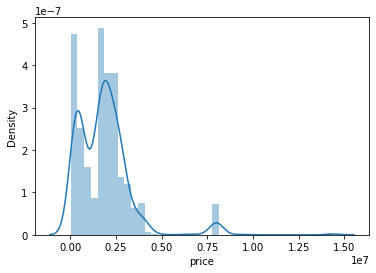

In [ ]:
#To show density of price 
sns.distplot(df['price'])

## 4. EDA

In [ ]:
#We made a grouping of the top 10 brands 
#which have the most amount of models 
df_brand = df.groupby('brand').agg({'model':'count'})
df_brand = df_brand.rename(columns = {'model':'Amount of model'})
df_brand = df_brand.sort_values(['Amount of model', 'brand'], ascending = [False, True])
df_brand.head(10)

,Amount of model
brand,
Toyota,279
Hyundai,146
Mazda,103
Honda,73
Nissan,68
Chevrolet,64
Ford,61
Jeep,56
GMC,47


In [ ]:
#We made a grouping of the colors by car brands
color_count = df.groupby('color')['brand'].count()
color_df = color_count.to_frame()
color_df

,brand
color,
Black,236
Blue,89
Gold,54
Green,12
Grey,133
Orange,1
Other,309
Red,62
Silver,87


In [ ]:
#Getting the index from DataFrame and appending it to the list
color_df = color_df.reset_index()
color_list = color_df['color'].tolist()
color_list

['Black',
 'Blue',
 'Gold',
 'Green',
 'Grey',
 'Orange',
 'Other',
 'Red',
 'Silver',
 'White',
 'Yellow']

In [ ]:
#Shows the counts of color to each brand
brand_count = color_df['brand'].tolist()
brand_count

[236, 89, 54, 12, 133, 1, 309, 62, 87, 147, 1]

In [ ]:
#Lowering the color names and adding them to dictionary 
plot_color = [c.lower() for c in color_list]
color_dict = dict(zip(color_list,plot_color))

In [ ]:
#Changing the undefined color(Other) to purple
color_dict['Other'] = 'purple'
color_dict

{'Black': 'black',
 'Blue': 'blue',
 'Gold': 'gold',
 'Green': 'green',
 'Grey': 'grey',
 'Orange': 'orange',
 'Other': 'purple',
 'Red': 'red',
 'Silver': 'silver',
 'White': 'white',
 'Yellow': 'yellow'}

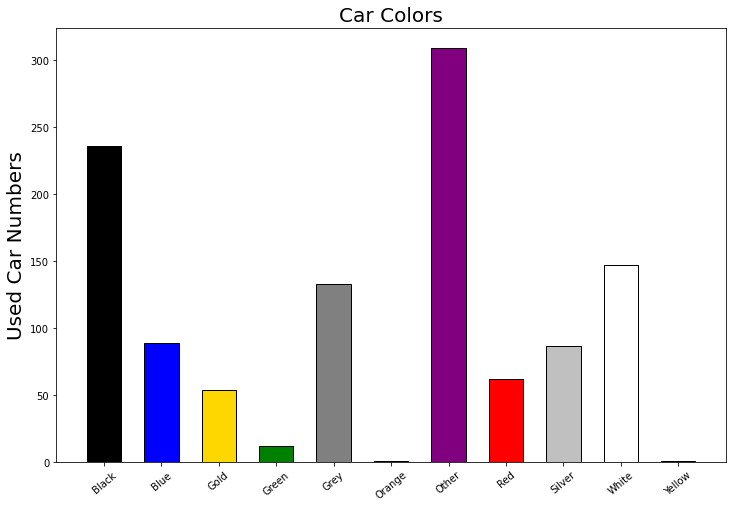

In [ ]:
#Plotting the bar chart that illustrates which color is the most used 
plt.figure(figsize = (12, 8))
plt.title('Car Colors', fontsize=20)
plt.ylabel('Used Car Numbers', fontsize=20)

# build the colors from the color dictionary
bars = plt.bar(range(len(color_list)), brand_count, 0.6, tick_label = color_list, color= [color_dict[c] for c in color_list],edgecolor='Black') 
plt.xticks(rotation=40)

plt.show()

In [ ]:
#Counting the transmission types 
df['transmission'].value_counts()

Automatic    828
Manual        57
Other          2
0              2
Name: transmission, dtype: int64

In [ ]:
#Replacing undefined transmission to Other
df['transmission'] = df['transmission'].str.replace('0', 'Other')

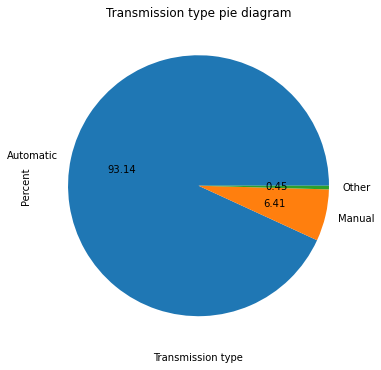

In [ ]:
#Plotting the pie chart of transmission types
df['transmission'].value_counts().plot.pie(figsize=(6, 6), autopct='%1.2f')
plt.title("Transmission type pie diagram")
plt.ylabel('Percent')
plt.xlabel('Transmission type');

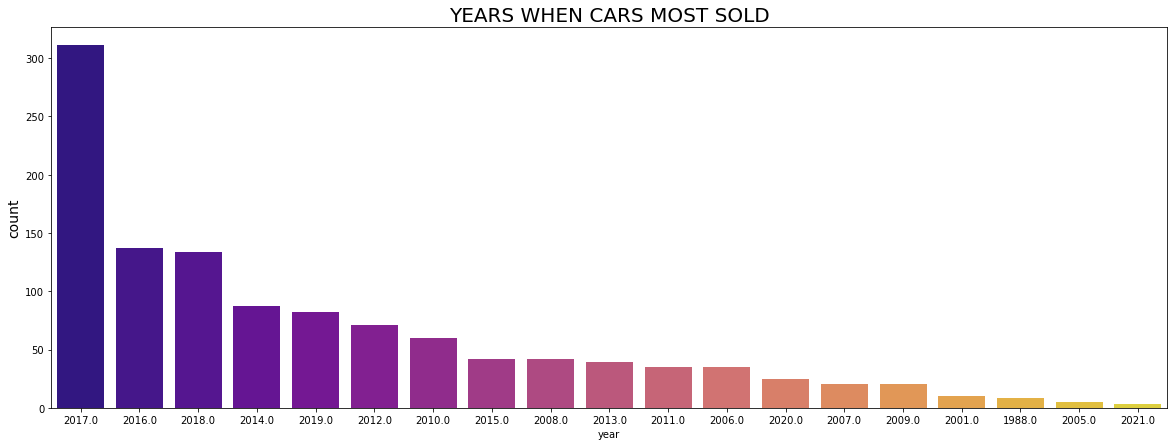

In [ ]:
#Plotting chart which gives information about number of cars in different years
plt.figure(figsize=(20, 7))
plt.ylabel("COUNT", size=14)
plt.title("YEARS WHEN CARS MOST SOLD", size=20)
sns.countplot(data=df,x='year',palette="plasma", order = df['year'].value_counts().index);

In [ ]:
#Finding the minimum value of mileage column 
df['mileage'].min()

4275.0

In [ ]:
#Finding the maximum value of mileage column 
df['mileage'].max()

558000.0

In [ ]:
#Dividing mileage to categories by founding the pace
categories = [
    (df.mileage >= 4275.0) & (df.mileage < 115020.0),
    (df.mileage >= 115020.0) & (df.mileage < 225765.0),
    (df.mileage >= 225765.0) & (df.mileage < 336510.0),
    (df.mileage >= 336510.0) & (df.mileage < 447255.0),
    (df.mileage >= 447255.0) & (df.mileage < 558000.0)]
   
values = ['1st', '2nd', '3rd', '4th', '5th']
df['mileage_category'] = np.select(categories, values)

df.head(10)

,brand,model,year,price,color,condition,transmission,fuel_type,mileage,mileage_category
0,Toyota,RAV4,2017.0,1899800.0,Black,Used,Automatic,Other,76091.0,1st
1,Mitsubishi,RVR,2018.0,1899800.0,Silver,Used,Automatic,Other,25525.0,1st
2,Buick,Encore,2019.0,2399800.0,Other,Used,Automatic,Other,38250.0,1st
3,Kia,Forte5,2012.0,400000.0,Black,Used,Other,Gasoline,202500.0,2nd
4,Honda,CR-V,2016.0,1899800.0,Other,Used,Automatic,Other,72897.0,1st
5,Toyota,RAV4,2017.0,2190000.0,Grey,Used,NaN,Gasoline,33745.0,1st
6,Mazda,Other,2006.0,249500.0,Grey,Used,Automatic,Gasoline,287100.0,3rd
7,Toyota,Corolla,2017.0,1690000.0,White,Used,NaN,Gasoline,95547.0,1st
8,Volkswagen,Jetta,2010.0,349500.0,Black,Used,Manual,Gasoline,185450.0,2nd
9,Audi,A8,2014.0,2599900.0,Black,Used,NaN,Gasoline,122408.0,2nd


Text(0.5, 1.0, 'Connection between fuel type and transmission')

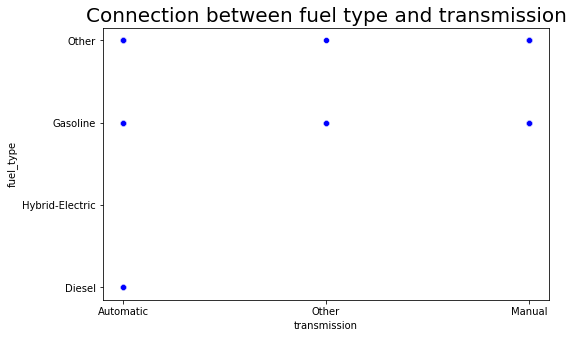

In [ ]:
#Connection between fuel type and transmission
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax = sns.scatterplot(x="transmission", y="fuel_type", data=df, color='blue')
ax.set_title('Connection between fuel type and transmission',fontsize=20)

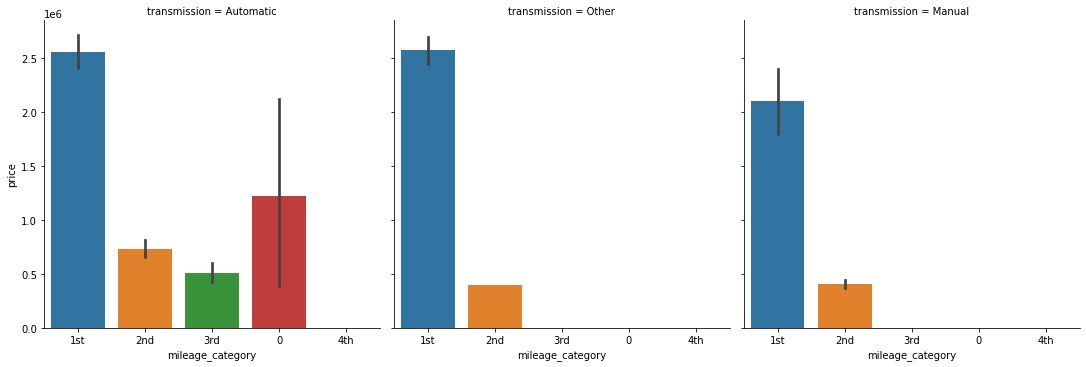

In [ ]:
#Demonstrate the price for each mileage category and transmission type
ax = sns.catplot(x="mileage_category", y="price",col='transmission', data=df,kind='bar')

In [ ]:
#Correlation between continuous values
df.corr()

,year,price,mileage
year,1.000000,0.551665,-0.664902
price,0.551665,1.000000,-0.479404
mileage,-0.664902,-0.479404,1.000000


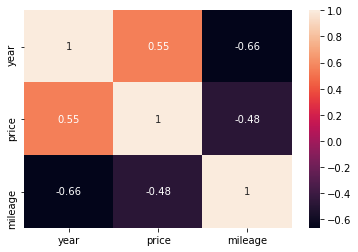

In [ ]:
#Creating correlation matrix 
corrMatrix = df.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()

## 5. Encoding and Preparing categorical variables

In [ ]:
#Encoding categorical values to continuous by LabelEncoder 
from sklearn.preprocessing import LabelEncoder

la_en = LabelEncoder()

df['color']=la_en.fit_transform(df['color'].astype(str))
df['condition']=la_en.fit_transform(df['condition'].astype(str))
df['transmission']=la_en.fit_transform(df['transmission'].astype(str))
df['fuel_type']=la_en.fit_transform(df['fuel_type'].astype(str))
df['brand']=la_en.fit_transform(df['brand'].astype(str))
df['model']=la_en.fit_transform(df['model'].astype(str))

df.head()

,brand,model,year,price,color,condition,transmission,fuel_type,mileage,mileage_category
0,26,58,2017.0,1899800.0,0,2,0,3,76091.0,1st
1,19,59,2018.0,1899800.0,10,2,0,3,25525.0,1st
2,3,24,2019.0,2399800.0,8,2,0,3,38250.0,1st
3,14,32,2012.0,400000.0,0,2,2,1,202500.0,2nd
4,9,10,2016.0,1899800.0,8,2,0,3,72897.0,1st


In [ ]:
#Gives information about DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1166 non-null   object 
 1   model             1166 non-null   object 
 2   year              1166 non-null   float64
 3   price             1156 non-null   float64
 4   color             1166 non-null   int64  
 5   condition         1166 non-null   int64  
 6   transmission      1166 non-null   int64  
 7   fuel_type         1166 non-null   int64  
 8   mileage           1163 non-null   float64
 9   mileage_category  1166 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 91.2+ KB


In [ ]:
# As we can see from INFO, there are some rows are empty.
#That's why we filling them with their mean 
mean = df['price'].mean()
df['price'].fillna(mean, inplace=True)

mean = df['mileage'].mean()
df['mileage'].fillna(mean, inplace=True)

## 6.  Model Building & Prediction accuracy 

In [ ]:
#Independent and dependent variables
x = df.drop('price', axis = 1)
y = df['price'].astype('int')

In [ ]:
#Doing feature engineering(scaling) by StandardScaler unique columns
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

col_names = ['brand', 'model','year', 'color', 'condition', 'transmission', 'fuel_type', 'mileage']
features = df[col_names]

scaler = ss.fit(features.values)
X = scaler.transform(features.values)

In [ ]:
#converting to DataFrame scaled features
scaled_features = pd.DataFrame(X, columns = col_names)
scaled_features.head()

,brand,model,year,color,condition,transmission,fuel_type,mileage
0,1.242298,0.699353,0.548460,-1.478608,0.126216,-0.605580,0.862203,-0.516775
1,0.389798,0.740822,0.775800,1.059009,0.126216,-0.605580,0.862203,-1.096422
2,-1.558774,-0.710592,1.003139,0.551485,0.126216,-0.605580,0.862203,-0.950553
3,-0.219131,-0.378840,-0.588235,-1.478608,0.126216,0.970549,-0.929827,0.932273
4,-0.828060,-1.291158,0.321121,0.551485,0.126216,-0.605580,0.862203,-0.553389


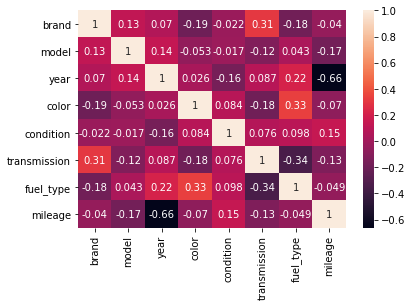

In [ ]:
# Correlation matrix to check which column is important:
corrMatrix = scaled_features.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#Demostrates variance
scaled_features.var()

brand           1.000858
model           1.000858
year            1.000858
color           1.000858
condition       1.000858
transmission    1.000858
fuel_type       1.000858
mileage         1.000858
dtype: float64

In [ ]:
#By importing train_test_split dividing X and y to train test with 30% proportion
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Illustrates length of x,y train and test
print('Lenth of x_train:',len(x_train))
print('Lenth of y_train:',len(y_train))
print('Lenth of x_test:',len(x_test))
print('Lenth of y_test:',len(y_test))

Lenth of x_train: 816
Lenth of y_train: 816
Lenth of x_test: 350
Lenth of y_test: 350


In [ ]:
#Shape of x and y
print(x.shape)
print(y.shape)

(1166, 9)
(1166,)


In [ ]:
#Accuracy model by KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Fit the k-nearest neighbors model to the training data.
knn.fit(x_train, y_train)

# Score the model on the test and train data
print('Accuracy model for test:', round(knn.score(x_test, y_test),2))
print('Accuracy model for train:',round(knn.score(x_train, y_train),2))

Accuracy model for test: 0.88
Accuracy model for train: 0.91


In [ ]:
#Actual value
y_test.head()

419    3299500
772     249500
936    2099800
194    1899800
446    1639900
Name: price, dtype: int64

In [ ]:
#Predicted value
pred_y = knn.predict(x_test) 
pd.DataFrame(pred_y).head()

,0
0,2900000
1,249500
2,2099800
3,1899800
4,1639900


In [ ]:
#Appending each accuracy to list
train_score = []
test_score = []

tr_score = knn.score(x_train, y_train)
train_score.append(tr_score)

te_score = knn.score(x_test, y_test)
test_score.append(te_score)

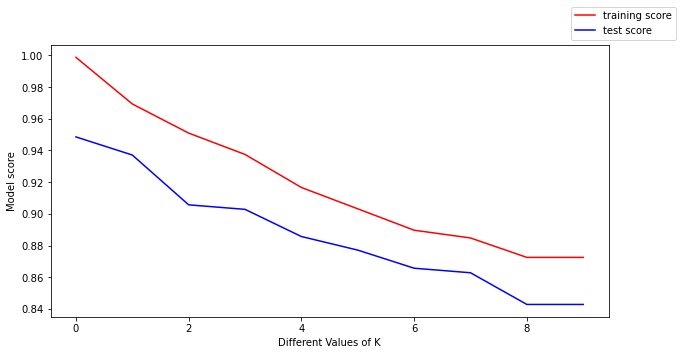

In [ ]:
#Potting graph to show accuracy of train and test for different values of K
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(train_score, color = 'r', label = "training score")
plt.plot(test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
#Variables which contains predicted values of x train test
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [ ]:
#Finding accuracy by metrics
from sklearn.metrics import mean_squared_error,r2_score

# model evaluation for testing set
RMSE = mean_squared_error(y_test,y_pred_test)
R2_te = r2_score(y_test,y_pred_test)

print("The model performance for Testing set")
print('RMSE = ',round(RMSE, 3))
print('R2 = ',round(R2_te, 3))

print(60*'-')



# model evaluation for training set
RMSE = mean_squared_error(y_train,y_pred_train)
R2_tr = r2_score(y_train,y_pred_train)

print("The model performance for Training set")
print('RMSE = ',round(RMSE, 3))
print('R2 = ',round(R2_tr, 3))

The model performance for Testing set
RMSE =  60047896400.0
R2 =  0.973
------------------------------------------------------------
The model performance for Training set
RMSE =  326520244450.304
R2 =  0.867


In [ ]:
#appending R2 scores of train and test 
train_score.append(R2_te)
test_score.append(R2_tr)

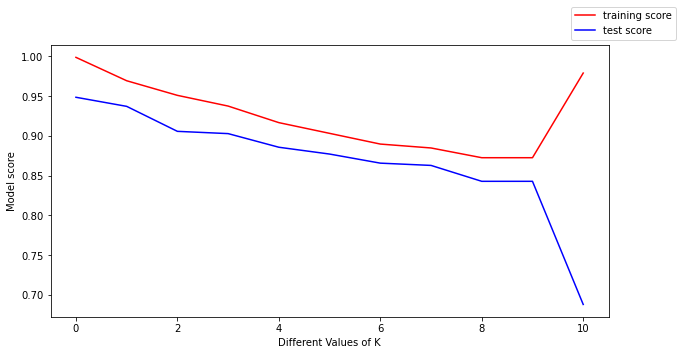

In [ ]:
#Potting graph to show accuracy of train and test for different values of K
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot( train_score, color = 'r', label = "training score")
plt.plot( test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
#Creating LinearRegression model 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Actual data
y_test.head()

419    3299500
772     249500
936    2099800
194    1899800
446    1639900
Name: price, dtype: int64

In [ ]:
#Predicted data to df
pred_y = reg.predict(x_test) 
pd.DataFrame(pred_y).head()

,0
0,2.772558e+06
1,7.037866e+04
2,1.959057e+06
3,1.602988e+06
4,3.118327e+06


In [ ]:
#Printing the scores for train and test data 
print('Accuracy model for test:', round(reg.score(x_test, y_test),2))
print('Accuracy model for train:',round(reg.score(x_train, y_train),2))

Accuracy model for test: 0.53
Accuracy model for train: 0.41
Intercept is:  1869292.08


In [ ]:
#appending LR scores of train and test 

LR_te = reg.score(x_test, y_test)
LR_tr = reg.score(x_train, y_train)

train_score.append(LR_te)
test_score.append(LR_tr)

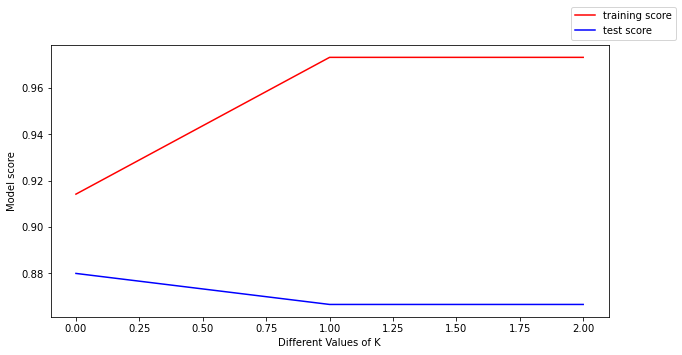

In [ ]:
#Plotting graph to show accuracy of train and test for different values of K
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(train_score, color = 'r', label = "training score")
plt.plot(test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
#General statistics information about our model 
est = smf.ols('price ~ brand + model + brand * model + year + condition + transmission + mileage', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          1.40e-151
Time:                        18:28:09   Log-Likelihood:                -17909.
No. Observations:                1166   AIC:                         3.583e+04
Df Residuals:                    1158   BIC:                         3.587e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -2.27e+08   2.05e+07    -11.050      0.000   -2.67e+08   -1.87e+08
brand        -2.767e+04   7702.835     -3.592      0.000   -4.28e+04   -1.26e+04
model         2.922e+04   2979.765      9.806      0.000    2.34e+04    3.51e+04
brand:model  -1077.4912    171.536     -6.281      0.000   -1414.047    -740.936
year          1.126e+05   1.02e+04     11.072      0.000    9.26e+04    1.33e+05
condition     1.228e+06   1.43e+05      8.598      0.000    9.48e+05    1.51e+06
transmission  1.647e+05   2.86e+04      5.755      0.000    1.09e+05    2.21e+05
mileage         -4.4247      0.518     -8.544      0.000      -5.441      -3.409
==============================================================================
Omnibus:                      940.292   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29516.255
Skew:                           3.492   Prob(JB):                         0.00
Kurtosis:                      26.638   Cond. No.                     9.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 8. Conclusion

+ According to the first graph, the most used color was white, while the least brown.
+ As it is noticeable in the pie chart the automatic transmission dominates on manual almost 9 times.
+ As we can see from the third graph the cars produced 6-7 years ago still actual than the newly produced cars approximately 10 times more.
+ The fourth chart shows the relation between fuel types and car transmission. So automatic transmission represents most correlation with all fuel types, while manual only with gasoline.
+ The last one illustrates the connection between the price and mileage category of each car transmission type.
+ Due to the fact that we have a small dataset, we used the knn model. The KNN model showed us high accuracy: 88% and 91% compared to the Linear regression which showed us 53% and 41% accuracy